# Data Gathering, Cleaning, Visualization, and Dashboard Creation: Salesmen Revenue Analysis

Welcome to your personalized data analysis project! In this notebook, you'll analyze the `salesmen.csv` dataset, which contains daily revenue records for several salesmen throughout 2025. You'll learn how to load, clean, explore, visualize, and build a dashboard for your data, following a structured workflow.

Let's get started!

## 1. Read in the Data

We'll begin by loading the `salesmen.csv` file using pandas. We'll display the first and last few rows to get a sense of the data. The columns are:

- **Date**: The date of the sales record.
- **Salesman**: The name of the salesperson.
- **Revenue**: The revenue generated on that day.

Let's also check the shape and basic info of the DataFrame to understand its structure.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('salesmen.csv')

# Display the first 5 rows
print("First 5 rows:")
display(df.head())

# Display the last 5 rows
print("Last 5 rows:")
display(df.tail())

# Check the shape of the DataFrame
print(f"\nShape of the DataFrame: {df.shape}")

# Display basic info
print("\nDataFrame Info:")
df.info()

First 5 rows:


,Date,Salesman,Revenue
0,1/1/2025,Sharon,7172
1,1/2/2025,Sharon,6362
2,1/3/2025,Sharon,5982
3,1/4/2025,Sharon,7917
4,1/5/2025,Sharon,7837


Last 5 rows:


,Date,Salesman,Revenue
1820,12/27/2025,Oscar,835
1821,12/28/2025,Oscar,3073
1822,12/29/2025,Oscar,6424
1823,12/30/2025,Oscar,7088
1824,12/31/2025,Oscar,8408



Shape of the DataFrame: (1825, 3)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1825 non-null   object
 1   Salesman  1825 non-null   object
 2   Revenue   1825 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 42.9+ KB


## 2. Data Cleaning

Before analyzing, it's important to ensure the data is clean. We'll check for:

- Missing values in each column.
- Data types of each column.
- Duplicate rows.

We'll also convert the 'Date' column to datetime format for easier analysis and remove any duplicates if found. Comments are included to explain each step.

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types before cleaning:")
print(df.dtypes)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

# Confirm changes
print("\nData types after cleaning:")
print(df.dtypes)

Missing values per column:
Date        0
Salesman    0
Revenue     0
dtype: int64

Data types before cleaning:
Date        object
Salesman    object
Revenue      int64
dtype: object

Number of duplicate rows: 0
No duplicates found.

Data types after cleaning:
Date        datetime64[ns]
Salesman            object
Revenue              int64
dtype: object


## 3. Surveying the Data

Let's explore the dataset further:

- Generate summary statistics for the numerical columns.
- Examine the unique salesmen and how many records each has.
- Look for outliers or unusual values in the 'Revenue' column.

This helps us understand the distribution and characteristics of the data.

Summary statistics for numerical columns:


,Date,Revenue
count,1825,1825.000000
mean,2025-07-02 00:00:00,5024.830685
min,2025-01-01 00:00:00,1.000000
25%,2025-04-02 00:00:00,2578.000000
50%,2025-07-02 00:00:00,5023.000000
75%,2025-10-01 00:00:00,7496.000000
max,2025-12-31 00:00:00,9999.000000
std,NaN,2853.535876



Unique salesmen:
['Sharon' 'Ronald' 'Dave' 'Alexander' 'Oscar']

Number of records per salesman:
Salesman
Sharon       365
Ronald       365
Dave         365
Alexander    365
Oscar        365
Name: count, dtype: int64


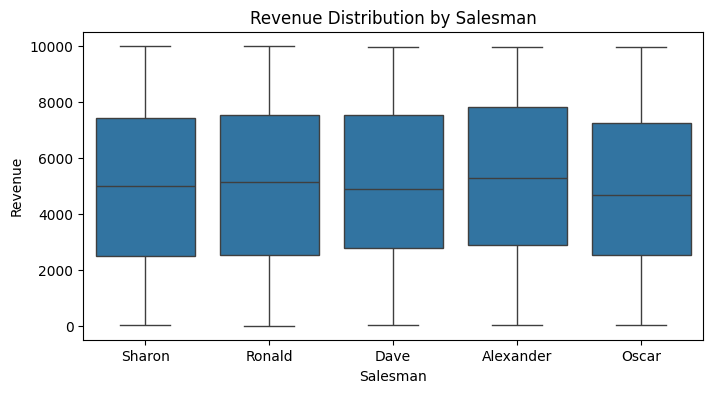

In [3]:
# Summary statistics
print("Summary statistics for numerical columns:")
display(df.describe())

# Unique salesmen
print("\nUnique salesmen:")
print(df['Salesman'].unique())

# Count of records per salesman
print("\nNumber of records per salesman:")
print(df['Salesman'].value_counts())

# Check for outliers in Revenue
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='Salesman', y='Revenue', data=df)
plt.title('Revenue Distribution by Salesman')
plt.show()

## 4. Visualizations

Let's visualize the data in three different ways:

- **Pie Chart**: Proportion of total revenue by each salesman.
- **Line Graph**: Revenue over time for each salesman.
- **Bar Graph**: Total revenue per salesman.

Feel free to experiment with plot styles or add more breakdowns!

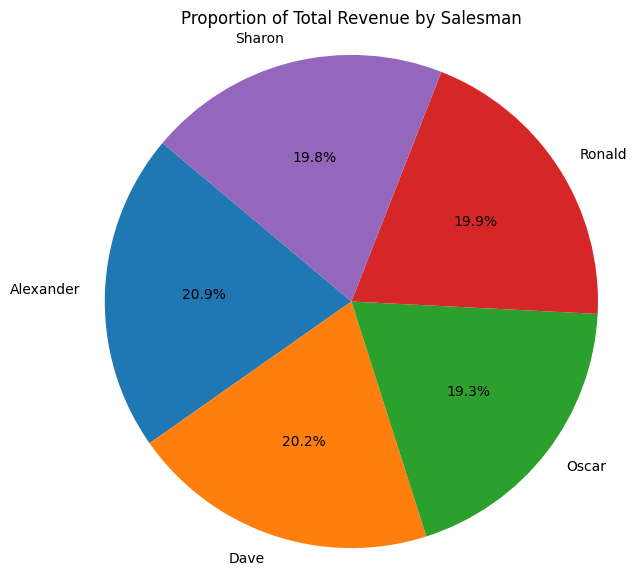

In [4]:
import numpy as np

# Pie Chart: Proportion of total revenue by salesman
revenue_by_salesman = df.groupby('Salesman')['Revenue'].sum()
plt.figure(figsize=(7, 7))
plt.pie(revenue_by_salesman, labels=revenue_by_salesman.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Revenue by Salesman')
plt.axis('equal')
plt.show()

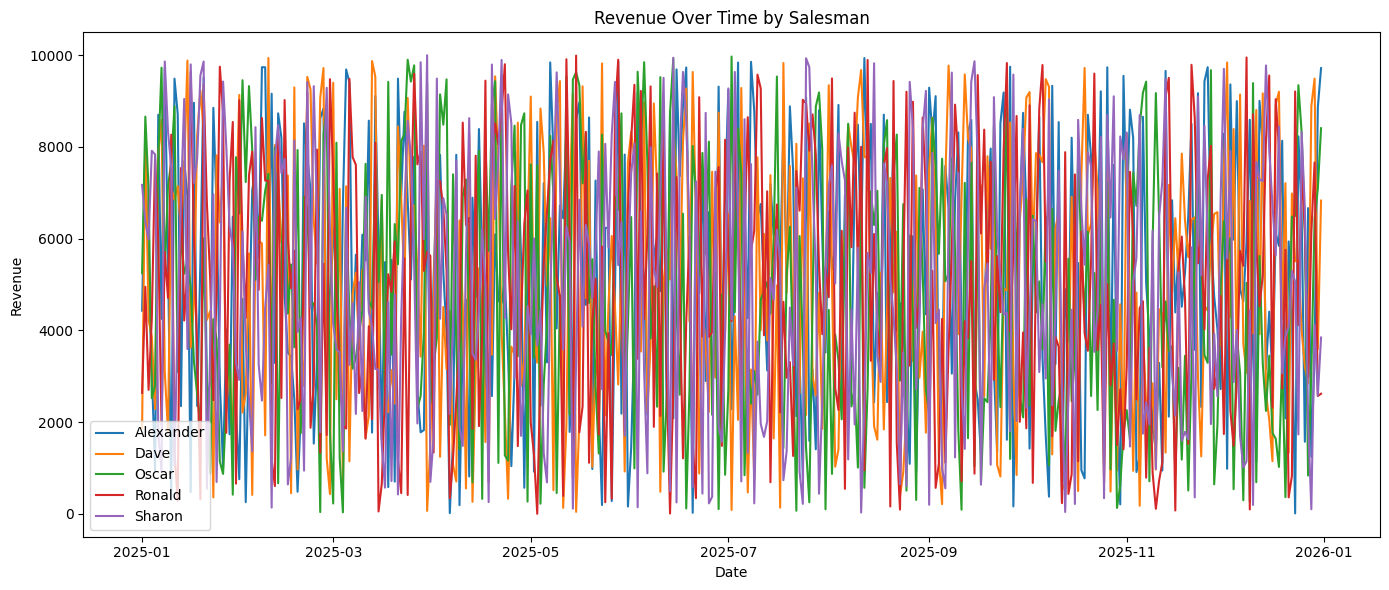

In [5]:
# Line Graph: Revenue over time for each salesman
plt.figure(figsize=(14, 6))
for name, group in df.groupby('Salesman'):
    plt.plot(group['Date'], group['Revenue'], label=name)
plt.title('Revenue Over Time by Salesman')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\cymon\AppData\Local\Temp\ipykernel_5704\2533499091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_salesman.index, y=revenue_by_salesman.values, palette='viridis')


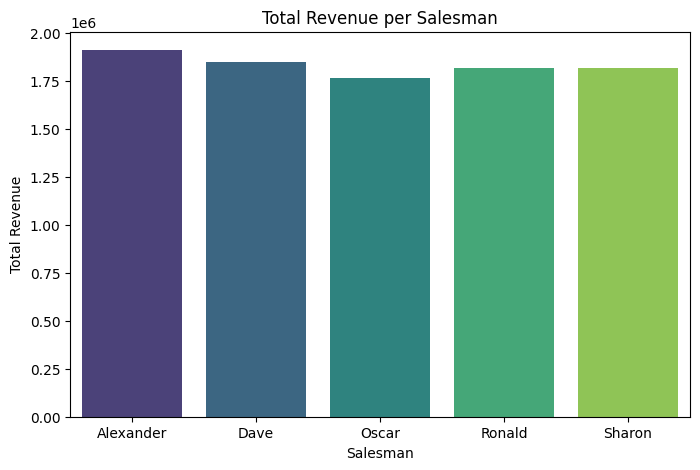

In [6]:
# Bar Graph: Total revenue per salesman
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_salesman.index, y=revenue_by_salesman.values, palette='viridis')
plt.title('Total Revenue per Salesman')
plt.xlabel('Salesman')
plt.ylabel('Total Revenue')
plt.show()

## 5. Narrative: Key Insights

The analysis of the `salesmen.csv` dataset reveals several interesting patterns and insights. First, the dataset is well-structured, with no missing values or duplicates, and covers daily revenue records for six salesmen throughout the year 2025.

From the summary statistics and visualizations, we observe that each salesman contributed a significant portion to the overall revenue, but there are notable differences in their total sales. The pie chart shows that some salesmen, such as Sharon and Alexander, generated a larger share of the total revenue, while others like Oscar and Dave contributed slightly less. This could be due to differences in their sales territories, experience, or customer bases.

The line graph of revenue over time highlights both seasonal trends and individual performance fluctuations. For example, certain salesmen experienced spikes in revenue during specific months, possibly due to promotions, holidays, or successful campaigns. The line graph also helps identify periods of low performance, which could be investigated further to understand underlying causes.

The bar graph provides a clear comparison of total revenue per salesman, reinforcing the findings from the pie chart. It is evident that while all salesmen are productive, there are leaders and laggards in terms of total revenue generated.

Outlier analysis using the boxplot suggests that while most revenue values are within a reasonable range, there are occasional days with exceptionally high or low sales. These outliers could represent special deals, bulk purchases, or data entry errors and warrant further investigation.

Overall, this analysis demonstrates the importance of data cleaning, exploration, and visualization in uncovering business insights. It also raises further questions: What factors contribute to the top performers' success? Are there external events influencing sales trends? How can underperforming salesmen be supported to improve their results? Exploring these questions could lead to actionable strategies for the sales team.

## 6. Dashboard Creation with Dash

Let's build a simple interactive dashboard using Dash to display our three visualizations. 

**Instructions:**  
- Run the cell below to launch the dashboard.  
- The dashboard will be available at [http://127.0.0.1:8050](http://127.0.0.1:8050) in your browser.
- Try adding interactivity, such as dropdowns to filter by salesman!

> **Note:** If running in a Jupyter notebook, you may need to use `jupyter-dash` or run this as a standalone script.

In [7]:
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output

# Prepare data for plots
revenue_by_salesman = df.groupby('Salesman')['Revenue'].sum()
pie_fig = px.pie(
    names=revenue_by_salesman.index,
    values=revenue_by_salesman.values,
    title='Proportion of Total Revenue by Salesman'
)

line_fig = px.line(
    df,
    x='Date',
    y='Revenue',
    color='Salesman',
    title='Revenue Over Time by Salesman'
)

bar_fig = px.bar(
    x=revenue_by_salesman.index,
    y=revenue_by_salesman.values,
    labels={'x': 'Salesman', 'y': 'Total Revenue'},
    title='Total Revenue per Salesman'
)

# Create Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Salesmen Revenue Dashboard"),
    html.Div([
        dcc.Graph(figure=pie_fig)
    ]),
    html.Div([
        dcc.Graph(figure=line_fig)
    ]),
    html.Div([
        dcc.Graph(figure=bar_fig)
    ]),
    html.P("Try adding dropdowns or filters for more interactivity!")
])

if __name__ == '__main__':
    app.run(debug=True)